In [1]:
# Importing necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import numpy as np
import random

english_to_french = [

    ("I am cold", "J'ai froid"),
    ("You are tired", "Tu es fatigué"),
    ("He is hungry", "Il a faim"),
    ("She is happy", "Elle est heureuse"),
    ("We are friends", "Nous sommes amis"),
    ("They are students", "Ils sont étudiants"),
    ("The cat is sleeping", "Le chat dort"),
    ("The sun is shining", "Le soleil brille"),
    ("We love music", "Nous aimons la musique"),
    ("She speaks French fluently", "Elle parle français couramment"),
    ("He enjoys reading books", "Il aime lire des livres"),
    ("They play soccer every weekend", "Ils jouent au football chaque week-end"),
    ("The movie starts at 7 PM", "Le film commence à 19 heures"),
    ("She wears a red dress", "Elle porte une robe rouge"),
    ("We cook dinner together", "Nous cuisinons le dîner ensemble"),
    ("He drives a blue car", "Il conduit une voiture bleue"),
    ("They visit museums often", "Ils visitent souvent des musées"),
    ("The restaurant serves delicious food", "Le restaurant sert une délicieuse cuisine"),
    ("She studies mathematics at university", "Elle étudie les mathématiques à l'université"),
    ("We watch movies on Fridays", "Nous regardons des films le vendredi"),
    ("He listens to music while jogging", "Il écoute de la musique en faisant du jogging"),
    ("They travel around the world", "Ils voyagent autour du monde"),
    ("The book is on the table", "Le livre est sur la table"),
    ("She dances gracefully", "Elle danse avec grâce"),
    ("We celebrate birthdays with cake", "Nous célébrons les anniversaires avec un gâteau"),
    ("He works hard every day", "Il travaille dur tous les jours"),
    ("They speak different languages", "Ils parlent différentes langues"),
    ("The flowers bloom in spring", "Les fleurs fleurissent au printemps"),
    ("She writes poetry in her free time", "Elle écrit de la poésie pendant son temps libre"),
    ("We learn something new every day", "Nous apprenons quelque chose de nouveau chaque jour"),
    ("The dog barks loudly", "Le chien aboie bruyamment"),
    ("He sings beautifully", "Il chante magnifiquement"),
    ("They swim in the pool", "Ils nagent dans la piscine"),
    ("The birds chirp in the morning", "Les oiseaux gazouillent le matin"),
    ("She teaches English at school", "Elle enseigne l'anglais à l'école"),
    ("We eat breakfast together", "Nous prenons le petit déjeuner ensemble"),
    ("He paints landscapes", "Il peint des paysages"),
    ("They laugh at the joke", "Ils rient de la blague"),
    ("The clock ticks loudly", "L'horloge tic-tac bruyamment"),
    ("She runs in the park", "Elle court dans le parc"),
    ("We travel by train", "Nous voyageons en train"),
    ("He writes a letter", "Il écrit une lettre"),
    ("They read books at the library", "Ils lisent des livres à la bibliothèque"),
    ("The baby cries", "Le bébé pleure"),
    ("She studies hard for exams", "Elle étudie dur pour les examens"),
    ("We plant flowers in the garden", "Nous plantons des fleurs dans le jardin"),
    ("He fixes the car", "Il répare la voiture"),
    ("They drink coffee in the morning", "Ils boivent du café le matin"),
    ("The sun sets in the evening", "Le soleil se couche le soir"),
    ("She dances at the party", "Elle danse à la fête"),
    ("We play music at the concert", "Nous jouons de la musique au concert"),
    ("He cooks dinner for his family", "Il cuisine le dîner pour sa famille"),
    ("They study French grammar", "Ils étudient la grammaire française"),
    ("The rain falls gently", "La pluie tombe doucement"),
    ("She sings a song", "Elle chante une chanson"),
    ("We watch a movie together", "Nous regardons un film ensemble"),
    ("He sleeps deeply", "Il dort profondément"),
    ("They travel to Paris", "Ils voyagent à Paris"),
    ("The children play in the park", "Les enfants jouent dans le parc"),
    ("She walks along the beach", "Elle se promène le long de la plage"),
    ("We talk on the phone", "Nous parlons au téléphone"),
    ("He waits for the bus", "Il attend le bus"),
    ("They visit the Eiffel Tower", "Ils visitent la tour Eiffel"),
    ("The stars twinkle at night", "Les étoiles scintillent la nuit"),
    ("She dreams of flying", "Elle rêve de voler"),
    ("We work in the office", "Nous travaillons au bureau"),
    ("He studies history", "Il étudie l'histoire"),
    ("They listen to the radio", "Ils écoutent la radio"),
    ("The wind blows gently", "Le vent souffle doucement"),
    ("She swims in the ocean", "Elle nage dans l'océan"),
    ("We dance at the wedding", "Nous dansons au mariage"),
    ("He climbs the mountain", "Il gravit la montagne"),
    ("They hike in the forest", "Ils font de la randonnée dans la forêt"),
    ("The cat meows loudly", "Le chat miaule bruyamment"),
    ("She paints a picture", "Elle peint un tableau"),
    ("We build a sandcastle", "Nous construisons un château de sable"),
    ("He sings in the choir", "Il chante dans le chœur"),
    ("They ride bicycles", "Ils font du vélo"),
    ("The coffee is hot", "Le café est chaud"),
    ("She wears glasses", "Elle porte des lunettes"),
    ("We visit our grandparents", "Nous rendons visite à nos grands-parents"),
    ("He plays the guitar", "Il joue de la guitare"),
    ("They go shopping", "Ils font du shopping"),
    ("The teacher explains the lesson", "Le professeur explique la leçon"),
    ("She takes the train to work", "Elle prend le train pour aller au travail"),
    ("We bake cookies", "Nous faisons des biscuits"),
    ("He washes his hands", "Il se lave les mains"),
    ("They enjoy the sunset", "Ils apprécient le coucher du soleil"),
    ("The river flows calmly", "La rivière coule calmement"),
    ("She feeds the cat", "Elle nourrit le chat"),
    ("We visit the museum", "Nous visitons le musée"),
    ("He fixes his bicycle", "Il répare son vélo"),
    ("They paint the walls", "Ils peignent les murs"),
    ("The baby sleeps peacefully", "Le bébé dort paisiblement"),
    ("She ties her shoelaces", "Elle attache ses lacets"),
    ("We climb the stairs", "Nous montons les escaliers"),
    ("He shaves in the morning", "Il se rase le matin"),
    ("They set the table", "Ils mettent la table"),
    ("The airplane takes off", "L'avion décolle"),
    ("She waters the plants", "Elle arrose les plantes"),
    ("We practice yoga", "Nous pratiquons le yoga"),
    ("He turns off the light", "Il éteint la lumière"),
    ("They play video games", "Ils jouent aux jeux vidéo"),
    ("The soup smells delicious", "La soupe sent délicieusement bon"),
    ("She locks the door", "Elle ferme la porte à clé"),
    ("We enjoy a picnic", "Nous profitons d'un pique-nique"),
    ("He checks his email", "Il vérifie ses emails"),
    ("They go to the gym", "Ils vont à la salle de sport"),
    ("The moon shines brightly", "La lune brille intensément"),
    ("She catches the bus", "Elle attrape le bus"),
    ("We greet our neighbors", "Nous saluons nos voisins"),
    ("He combs his hair", "Il se peigne les cheveux"),
    ("They wave goodbye", "Ils font un signe d'adieu")

]


# Special tokens for the start and end of sequences
SOS_token = 0  # Start Of Sequence Token
EOS_token = 1  # End Of Sequence Token

In [2]:
def build_vocab(sentences):
    vocab = {"<SOS>": SOS_token, "<EOS>": EOS_token}
    index = 2  
    for sentence in sentences:
        for word in sentence.split():  
            if word not in vocab:
                vocab[word] = index
                index += 1
    return vocab

english_vocab = build_vocab([pair[0] for pair in english_to_french])
french_vocab = build_vocab([pair[1] for pair in english_to_french])
index_to_french = {i: word for word, i in french_vocab.items()}

# Convert sentences to index sequences
def encode_sentence(sentence, vocab):
    return [vocab[word] for word in sentence.split() if word in vocab] + [EOS_token]  # Add <EOS>

english_encoded = [encode_sentence(pair[0], english_vocab) for pair in english_to_french]
french_encoded = [encode_sentence(pair[1], french_vocab) for pair in english_to_french]

# Find max sequence lengths
max_len_eng = max(len(seq) for seq in english_encoded)
max_len_fr = max(len(seq) for seq in french_encoded)
# Function to pad sequences
def pad_sequence(seq, max_len):
    return seq + [EOS_token] * (max_len - len(seq))  # Pad with <EOS>
english_padded = [pad_sequence(seq, max_len_eng) for seq in english_encoded]
french_padded = [pad_sequence(seq, max_len_fr) for seq in french_encoded]

# Convert to tensors
english_tensors = torch.tensor(english_padded, dtype=torch.long)
french_tensors = torch.tensor(french_padded, dtype=torch.long)

class English_to_French(Dataset):
    def __init__(self, eng, fr):
        self.english = eng
        self.french = fr

    def __len__(self):
        return len(self.english)

    def __getitem__(self, idx):
        return self.english[idx], self.french[idx]

# Create DataLoader
dataset = English_to_French(english_tensors, french_tensors)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)



In [3]:



class Encoder(nn.Module):
    """The Encoder part of the seq2seq model."""
    def __init__(self, input_size, hidden_size):
        super(Encoder, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(input_size, hidden_size)  # Embedding layer
        self.gru = nn.GRU(hidden_size, hidden_size)

    def forward(self, input, hidden):
        # Forward pass for the encoder
        embedded = self.embedding(input).view(1, 1, -1)
        output, hidden = self.gru(embedded, hidden)
        return output, hidden

    def initHidden(self):
        # Initializes hidden state
        return (torch.zeros(1, 1, self.hidden_size, device=device))

class Decoder(nn.Module):
    """The Decoder part of the seq2seq model."""
    def __init__(self, hidden_size, output_size):
        super(Decoder, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(output_size, hidden_size)  # Embedding layer
        self.gru = nn.GRU(hidden_size, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)
                             
    def forward(self, input, hidden):
        embedded = self.embedding(input).view(1, 1, -1)
        output, hidden = self.gru(embedded, hidden)
        output = self.softmax(self.out(output[0]))
        return output, hidden

    def initHidden(self):
        return (torch.zeros(1, 1, self.hidden_size, device=device)) 


In [4]:





def train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion):
    encoder_hidden = encoder.initHidden()
    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    input_length = input_tensor.size(0)
    target_length = target_tensor.size(0)
    loss = 0

    for ei in range(input_length):
        encoder_output, encoder_hidden = encoder(input_tensor[ei].unsqueeze(0), encoder_hidden)

    decoder_input = torch.tensor([SOS_token], device=device)
    decoder_hidden = encoder_hidden

    for di in range(target_length):
        decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
        topv, topi = decoder_output.topk(1)
        decoder_input = topi.squeeze().detach()
        loss += criterion(decoder_output, target_tensor[di].unsqueeze(0))
        if decoder_input.item() == EOS_token:
            break

    loss.backward()
    encoder_optimizer.step()
    decoder_optimizer.step()

    return loss.item()

def evaluate(encoder, decoder, data_loader, criterion):
    encoder.eval()
    decoder.eval()
    total_loss = 0
    total_correct = 0
    total_samples = 0

    with torch.no_grad():
        for input_tensor, target_tensor in data_loader:
            input_tensor = input_tensor[0].to(device)
            target_tensor = target_tensor[0].to(device)
            encoder_hidden = encoder.initHidden()

            input_length = input_tensor.size(0)
            target_length = target_tensor.size(0)

            # Encoder
            for ei in range(input_length):
                encoder_output, encoder_hidden = encoder(input_tensor[ei].unsqueeze(0), encoder_hidden)

            decoder_input = torch.tensor([SOS_token], device=device)
            decoder_hidden = encoder_hidden
            loss = 0
            predicted = []

            for di in range(target_length):
                decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
                topv, topi = decoder_output.topk(1)
                decoder_input = topi.squeeze().detach()
                predicted.append(topi.item())
                loss += criterion(decoder_output, target_tensor[di].unsqueeze(0))
                if decoder_input.item() == EOS_token:
                    break

            total_loss += loss.item()
            # Compare predicted vs. target (excluding <EOS>)
            target_list = target_tensor.tolist()
            if EOS_token in target_list:
                target_list = target_list[:target_list.index(EOS_token) + 1]
            if EOS_token in predicted:
                predicted = predicted[:predicted.index(EOS_token) + 1]
            if predicted == target_list:
                total_correct += 1
            total_samples += 1

    avg_loss = total_loss / len(data_loader)
    accuracy = total_correct / total_samples
    return avg_loss, accuracy




In [5]:
# Set up training parameters
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
encoder = Encoder(len(english_vocab), 256).to(device)
decoder = Decoder(256, len(french_vocab)).to(device)

encoder_optimizer = optim.Adam(encoder.parameters(), lr=0.005)
decoder_optimizer = optim.Adam(decoder.parameters(), lr=0.005)
criterion = nn.NLLLoss()

num_epochs = 100
train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    encoder.train()
    decoder.train()
    total_train_loss = 0

    for input_tensor, target_tensor in dataloader:
        input_tensor = input_tensor[0].to(device)
        target_tensor = target_tensor[0].to(device)

        loss = train(input_tensor, target_tensor, encoder, decoder,
                     encoder_optimizer, decoder_optimizer, criterion)
        total_train_loss += loss

    avg_train_loss = total_train_loss / len(dataloader)
    train_losses.append(avg_train_loss)

    val_loss, val_acc = evaluate(encoder, decoder, dataloader, criterion)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {avg_train_loss:.4f} | "
          f"Val Loss: {val_loss:.4f} | Val Accuracy: {val_acc:.2%}")


Epoch 1/100 | Train Loss: 23.0597 | Val Loss: 20.5676 | Val Accuracy: 0.00%
Epoch 2/100 | Train Loss: 20.2987 | Val Loss: 16.3387 | Val Accuracy: 0.00%
Epoch 3/100 | Train Loss: 19.0935 | Val Loss: 17.6450 | Val Accuracy: 2.65%
Epoch 4/100 | Train Loss: 17.0861 | Val Loss: 12.9121 | Val Accuracy: 4.42%
Epoch 5/100 | Train Loss: 13.5629 | Val Loss: 9.0406 | Val Accuracy: 8.85%
Epoch 6/100 | Train Loss: 10.3782 | Val Loss: 10.1047 | Val Accuracy: 10.62%
Epoch 7/100 | Train Loss: 9.0816 | Val Loss: 7.6584 | Val Accuracy: 21.24%
Epoch 8/100 | Train Loss: 7.4409 | Val Loss: 6.8467 | Val Accuracy: 23.89%
Epoch 9/100 | Train Loss: 7.0508 | Val Loss: 7.0270 | Val Accuracy: 34.51%
Epoch 10/100 | Train Loss: 6.5557 | Val Loss: 5.4564 | Val Accuracy: 46.90%
Epoch 11/100 | Train Loss: 5.9931 | Val Loss: 4.7525 | Val Accuracy: 60.18%
Epoch 12/100 | Train Loss: 3.9008 | Val Loss: 5.0774 | Val Accuracy: 59.29%
Epoch 13/100 | Train Loss: 4.1512 | Val Loss: 3.5532 | Val Accuracy: 70.80%
Epoch 14/100 | 

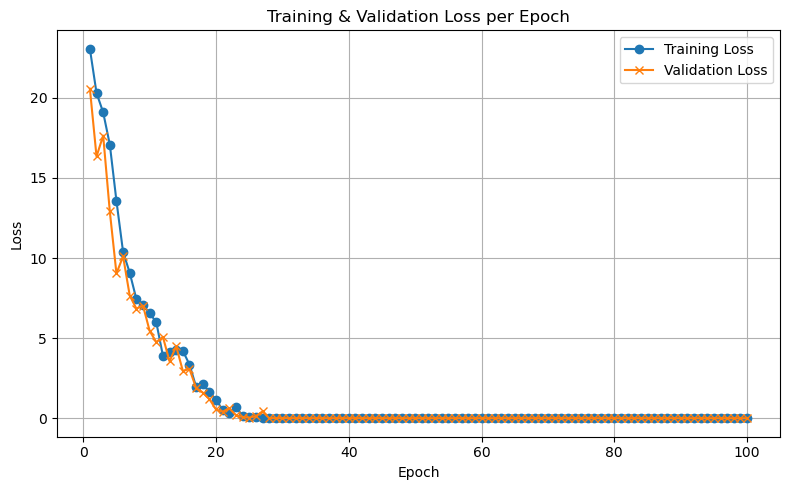

In [6]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label="Training Loss", marker='o')
plt.plot(range(1, num_epochs + 1), val_losses, label="Validation Loss", marker='x')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training & Validation Loss per Epoch")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


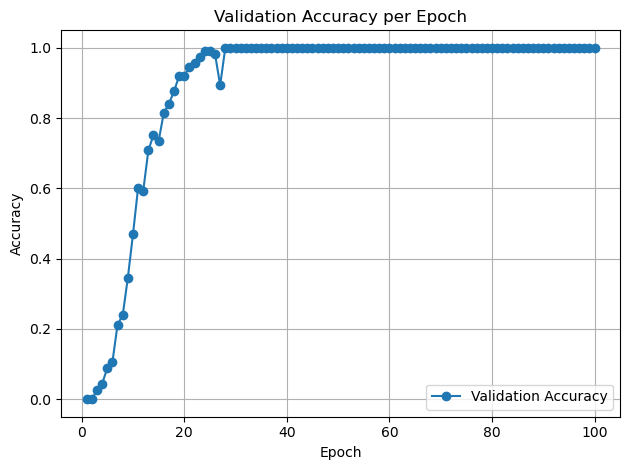

In [7]:
plt.plot(range(1, num_epochs + 1), val_accuracies, label="Validation Accuracy", marker='o')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy per Epoch")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
def translate(encoder, decoder, sentence, max_length=20):
    encoder.eval()
    decoder.eval()

    # Tokenize and encode the English input sentence
    tokens = sentence.strip().split()
    encoded = [english_vocab.get(word, english_vocab["<EOS>"]) for word in tokens]
    encoded = pad_sequence(encoded, max_len_eng)  # Use same length as training
    input_tensor = torch.tensor(encoded, dtype=torch.long, device=device).unsqueeze(0)

    # Encode the input
    with torch.no_grad():
        encoder_hidden = encoder.initHidden()
        for ei in range(input_tensor.size(1)):
            encoder_output, encoder_hidden = encoder(input_tensor[0][ei].unsqueeze(0), encoder_hidden)

        decoder_input = torch.tensor([SOS_token], device=device)
        decoder_hidden = encoder_hidden
        translated_words = []

        for _ in range(max_length):
            decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
            topv, topi = decoder_output.topk(1)
            next_word_idx = topi.item()

            if next_word_idx == EOS_token:
                break

            translated_words.append(index_to_french.get(next_word_idx, "<UNK>"))
            decoder_input = topi.squeeze().detach()

    return " ".join(translated_words)


In [12]:
test_sentences = [
    "I am cold",
    "She is happy",
    "They play soccer every weekend",
    "We love music",
    "The cat is sleeping"
]


target_translations = [
    "J'ai froid",
    "Elle est heureuse",
    "Ils jouent au football chaque week-end",
    "Nous aimons la musique",
    "Le chat dort"
]


for sent, target in zip(test_sentences, target_translations):
    output = translate(encoder, decoder, sent)
    print(f"ENGLISH : {sent}")
    print(f"PREDICT : {output}")
    print(f"TARGET  : {target}")
    print("-" * 50)


ENGLISH : I am cold
PREDICT : J'ai froid
TARGET  : J'ai froid
--------------------------------------------------
ENGLISH : She is happy
PREDICT : Elle est heureuse
TARGET  : Elle est heureuse
--------------------------------------------------
ENGLISH : They play soccer every weekend
PREDICT : Ils jouent au football chaque week-end
TARGET  : Ils jouent au football chaque week-end
--------------------------------------------------
ENGLISH : We love music
PREDICT : Nous aimons la musique
TARGET  : Nous aimons la musique
--------------------------------------------------
ENGLISH : The cat is sleeping
PREDICT : Le chat dort
TARGET  : Le chat dort
--------------------------------------------------


In [13]:
test_sentences = [
    "I am happy",
    "The dog is barking",
    "We watch TV",
    "She reads a book",
    "They drink water"
]

target_translations = [
    "Je suis heureux",             # or "Je suis heureuse"
    "Le chien aboie",
    "Nous regardons la télé",
    "Elle lit un livre",
    "Ils boivent de l'eau"
]

for sent, target in zip(test_sentences, target_translations):
    output = translate(encoder, decoder, sent)
    print(f"ENGLISH : {sent}")
    print(f"PREDICT : {output}")
    print(f"TARGET  : {target}")
    print("-" * 50)


ENGLISH : I am happy
PREDICT : Le bébé dort
TARGET  : Je suis heureux
--------------------------------------------------
ENGLISH : The dog is barking
PREDICT : Le soleil brille
TARGET  : Le chien aboie
--------------------------------------------------
ENGLISH : We watch TV
PREDICT : Nous regardons un film ensemble
TARGET  : Nous regardons la télé
--------------------------------------------------
ENGLISH : She reads a book
PREDICT : Elle porte une robe rouge
TARGET  : Elle lit un livre
--------------------------------------------------
ENGLISH : They drink water
PREDICT : Ils font du shopping
TARGET  : Ils boivent de l'eau
--------------------------------------------------
